How to identify?
- There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5% may cause over-fitting in trees.
- labels with a low frequency, add noise instead of information. 

How to Handle?
- Replace the rare label by most frequent label
- Group the observations that show rare labels into a unique category (with a new label like 'Rare', or 'Other')(Most Frequently used)


Solutions: Evaluate the consequences of replacing rare labels in variables with:

    One predominant category
    A small number of different categories
    High cardinality


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None) 
import warnings
warnings.filterwarnings('ignore')

#### House Price Prediction

In [2]:
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\house_price.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 81), (438, 81))

In [4]:
def train_rf(X_train, y_train, X_test, y_test, columns):
    # function to train the random forest
    # and test it on train and test sets
    
    rf = RandomForestRegressor(n_estimators=50, random_state=12)
    
    if type(columns)==str: # if we train using only 1 variable (pass a string instead of list in the "columns" argument of the function)
        rf.fit(X_train[columns].to_frame(), y_train.values)
        pred_train = rf.predict(X_train[columns].to_frame())
        pred_test = rf.predict(X_test[columns].to_frame())
        
    else: # if we train using multiple variables (pass a list in the argument "columns")
        rf.fit(X_train[columns], y_train.values)
        pred_train = rf.predict(X_train[columns])
        pred_test = rf.predict(X_test[columns])
        
    print('Train: Random Forests mse: {}'.format(mean_squared_error(y_train, pred_train)))
    
    print('Test: Random Forests mse: {}'.format(mean_squared_error(y_test, pred_test)))

In [5]:
def labels_to_numbers(X_train, X_test, columns):
    # function to encode labels into numbers
    # each label will be assigned an ordinal number from 0 onwards
    
    for col in columns:
        labels_dict = {k:i for i, k in enumerate(X_train[col].unique(), 0)}
        X_train.loc[:, col] = X_train.loc[:, col].map(labels_dict )
        X_test.loc[:, col] = X_test.loc[:, col].map(labels_dict)

In [6]:
X_train['Street'].head()

64      Pave
682     Pave
960     Pave
1384    Pave
1100    Pave
Name: Street, dtype: object

In [7]:
print(X_train.Street.value_counts())
print()
print(X_train.Street.value_counts() / np.float(len(X_train)))

Pave    1017
Grvl       5
Name: Street, dtype: int64

Pave    0.995108
Grvl    0.004892
Name: Street, dtype: float64


In [8]:
labels_to_numbers(X_train, X_test, ['Street'])

In [9]:
X_train['Street'].head()

64      0
682     0
960     0
1384    0
1100    0
Name: Street, dtype: int64

In [10]:
train_rf(X_train, y_train, X_test, y_test, ['Street'])

Train: Random Forests mse: 6089573832.083087
Test: Random Forests mse: 6781609530.454684


In [11]:
for col in data.columns:
    if data[col].dtypes =='O': # if the variable is categorical
        if len(data[col].unique())<3: # if the variable has less than 3 categories
            print(data.groupby(col)[col].count()/np.float(len(data))) # print percentage of observations per category
            print()

Street
Grvl    0.00411
Pave    0.99589
Name: Street, dtype: float64

Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64

CentralAir
N    0.065068
Y    0.934932
Name: CentralAir, dtype: float64



Conclusion:
     In the first 2 variables, Street and Utilities, the variables show one dominating category which accounts for more than 99% of the observations. In the third variable, the dominating category is present in more than 90% of the observations.

#### Variables with few Categories

In [12]:
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\house_price.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
cols = ['MasVnrType', 'ExterQual', 'BsmtCond']
for col in cols:
    print(data.groupby(col)[col].count()/np.float(len(data)))
    print()

MasVnrType
BrkCmn     0.010274
BrkFace    0.304795
None       0.591781
Stone      0.087671
Name: MasVnrType, dtype: float64

ExterQual
Ex    0.035616
Fa    0.009589
Gd    0.334247
TA    0.620548
Name: ExterQual, dtype: float64

BsmtCond
Fa    0.030822
Gd    0.044521
Po    0.001370
TA    0.897945
Name: BsmtCond, dtype: float64



In [14]:
X_train[cols].isnull().sum()

MasVnrType     5
ExterQual      0
BsmtCond      24
dtype: int64

In [15]:
def impute_na(df_train, df_test, variable):
    # find most frequent category
    most_frequent_category = df_train.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    
    # replace NA with most frequent category
    df_train[variable].fillna(most_frequent_category, inplace=True)
    df_test[variable].fillna(most_frequent_category, inplace=True)

In [16]:
for col in ['MasVnrType', 'BsmtCond']:
    impute_na(X_train, X_test, col)
    
X_train[cols].isnull().sum()

MasVnrType    0
ExterQual     0
BsmtCond      0
dtype: int64

In [18]:
print(X_train.groupby('MasVnrType')['MasVnrType'].count()/np.float(len(X_train)))

MasVnrType
BrkCmn     0.009785
BrkFace    0.294521
None       0.600783
Stone      0.094912
Name: MasVnrType, dtype: float64


Observation: BrkCmn is present in less than 1% of the observations. Since it is the only category under-represented, creating a new category called 'Rare' to group this label does not make much sense

Replace the rare label by the most frequent category, in this case, 'None'.

In [19]:
frequent_cat = X_train.groupby('MasVnrType')['MasVnrType'].count().sort_values().tail(1).index.values[0]
frequent_cat

'None'

In [20]:
temp = X_train.groupby('MasVnrType')['MasVnrType'].count()/np.float(len(X_train))
[x for x in temp.loc[temp<0.05].index.values]

['BrkCmn']

In [21]:
def rare_imputation(X_train, X_test, variable):
    
    # find the most frequent category
    frequent_cat = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
    
    # find rare labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    rare_cat = [x for x in temp.loc[temp<0.05].index.values]
    
    # create new variables, with Rare labels imputed by the most frequent category
    X_train[variable+'_freq_imp'] = np.where(X_train[variable].isin(rare_cat), frequent_cat, X_train[variable])
    X_test[variable+'_freq_imp'] = np.where(X_test[variable].isin(rare_cat), frequent_cat, X_test[variable])
    
    # adding a new label 'Rare'
    X_train[variable+'_rare_imp'] = np.where(X_train[variable].isin(rare_cat), 'Rare', X_train[variable])
    X_test[variable+'_rare_imp'] = np.where(X_test[variable].isin(rare_cat), 'Rare', X_test[variable])

In [22]:
rare_imputation(X_train, X_test, 'MasVnrType')
# visualise the transformed dataset
X_train[['MasVnrType', 'MasVnrType_rare_imp', 'MasVnrType_freq_imp']].head(10)

,MasVnrType,MasVnrType_rare_imp,MasVnrType_freq_imp
64,BrkFace,BrkFace,BrkFace
682,None,None,None
960,None,None,None
1384,None,None,None
1100,None,None,None
416,BrkFace,BrkFace,BrkFace
1034,None,None,None
853,BrkFace,BrkFace,BrkFace
472,BrkFace,BrkFace,BrkFace
1011,None,None,None


In [23]:
print(X_train.groupby('MasVnrType')['MasVnrType'].count()/np.float(len(X_train)))

MasVnrType
BrkCmn     0.009785
BrkFace    0.294521
None       0.600783
Stone      0.094912
Name: MasVnrType, dtype: float64


In [24]:
print(X_train.groupby('MasVnrType_rare_imp')['MasVnrType_rare_imp'].count()/np.float(len(X_train)))

MasVnrType_rare_imp
BrkFace    0.294521
None       0.600783
Rare       0.009785
Stone      0.094912
Name: MasVnrType_rare_imp, dtype: float64


In [30]:
print(X_train.groupby('MasVnrType_freq_imp')['MasVnrType_freq_imp'].count()/np.float(len(X_train)))

MasVnrType_freq_imp
0    0.294521
1    0.610568
2    0.094912
Name: MasVnrType_freq_imp, dtype: float64


In [31]:
labels_to_numbers(X_train, X_test, ['MasVnrType', 'MasVnrType_rare_imp', 'MasVnrType_freq_imp'])

# and then we build a random forest using the original distribution
train_rf(X_train, y_train, X_test, y_test, 'MasVnrType')

Train: Random Forests mse: 4880294201.415182
Test: Random Forests mse: 5789616777.672336


In [32]:
train_rf(X_train, y_train, X_test, y_test, 'MasVnrType_freq_imp')

Train: Random Forests mse: 4881081950.281514
Test: Random Forests mse: 5791433693.176621


Observation:Random forest built over the training set in which we grouped the rare label with the most frequent label has a better performance

In [33]:
print(X_train.groupby('ExterQual')['ExterQual'].count()/np.float(len(X_train)))

ExterQual
Ex    0.029354
Fa    0.011742
Gd    0.332681
TA    0.626223
Name: ExterQual, dtype: float64


In [34]:
rare_imputation(X_train, X_test, 'ExterQual')
X_train[['ExterQual', 'ExterQual_rare_imp', 'ExterQual_freq_imp']].head(10)

,ExterQual,ExterQual_rare_imp,ExterQual_freq_imp
64,TA,TA,TA
682,TA,TA,TA
960,TA,TA,TA
1384,TA,TA,TA
1100,TA,TA,TA
416,TA,TA,TA
1034,TA,TA,TA
853,TA,TA,TA
472,TA,TA,TA
1011,TA,TA,TA


In [35]:
print(X_train.groupby('ExterQual')['ExterQual'].count()/np.float(len(X_train)))

ExterQual
Ex    0.029354
Fa    0.011742
Gd    0.332681
TA    0.626223
Name: ExterQual, dtype: float64


In [36]:
print(X_train.groupby('ExterQual_rare_imp')['ExterQual_rare_imp'].count()/np.float(len(X_train)))

ExterQual_rare_imp
Gd      0.332681
Rare    0.041096
TA      0.626223
Name: ExterQual_rare_imp, dtype: float64


In [37]:
labels_to_numbers(X_train, X_test, ['ExterQual', 'ExterQual_rare_imp', 'ExterQual_freq_imp'])

# and now we build Random Forests using the original variable
train_rf(X_train, y_train, X_test, y_test, 'ExterQual')

Train: Random Forests mse: 3286282583.2384067
Test: Random Forests mse: 3333667225.3163695


In [38]:
train_rf(X_train, y_train, X_test, y_test, 'ExterQual_rare_imp')

Train: Random Forests mse: 3970349717.8092146
Test: Random Forests mse: 3728173674.7057304


In [39]:
train_rf(X_train, y_train, X_test, y_test, 'ExterQual_freq_imp')

Train: Random Forests mse: 4777417983.651753
Test: Random Forests mse: 5574400602.19047


Observation:Replacing the infrequent labels by the most frequent ones makes the random forests under-perform 

In [41]:
data.groupby('ExterQual')['SalePrice'].median()

ExterQual
Ex    364606.5
Fa     82250.0
Gd    220000.0
TA    139450.0
Name: SalePrice, dtype: float64

Observation: median house price among the 2 rare categories is extremely different. Thus, merging them into one masks the value added by this label. And this is why, in this case, keeping the labels separate renders better performance of the algorithm.

In [42]:
print(X_train.groupby('BsmtCond')['BsmtCond'].count()/np.float(len(X_train)))

BsmtCond
Fa    0.032290
Gd    0.045010
Po    0.001957
TA    0.920744
Name: BsmtCond, dtype: float64


In [43]:
rare_imputation(X_train, X_test, 'BsmtCond')

In [44]:
print(X_train.groupby('BsmtCond')['BsmtCond'].count()/np.float(len(X_train)))

BsmtCond
Fa    0.032290
Gd    0.045010
Po    0.001957
TA    0.920744
Name: BsmtCond, dtype: float64


In [45]:
print(X_train.groupby('BsmtCond_freq_imp')['BsmtCond_freq_imp'].count()/np.float(len(X_train)))

BsmtCond_freq_imp
TA    1.0
Name: BsmtCond_freq_imp, dtype: float64


In [46]:
print(X_train.groupby('BsmtCond_rare_imp')['BsmtCond_rare_imp'].count()/np.float(len(X_train)))

BsmtCond_rare_imp
Rare    0.079256
TA      0.920744
Name: BsmtCond_rare_imp, dtype: float64


Observations:

    few categories are unlikely to bring so much noise
    
    if the number of categories increases, then it becomes more important to handle the rare labels.

#### Handling high cardinality

In [47]:
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\house_price.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 81), (438, 81))

In [49]:
def train_rf(X_train, y_train, X_test, y_test, columns):
    # function to train the random forest
    # and test it on train and test sets
    
    rf = RandomForestRegressor(n_estimators=800, random_state=39)
    
    if type(columns)==str: # if we train using only 1 variable (pass a string instead of list in the "columns" argument of the function)
        rf.fit(X_train[columns].to_frame(), y_train.values)
        pred_train = rf.predict(X_train[columns].to_frame())
        pred_test = rf.predict(X_test[columns].to_frame())
        
    else: # if we train using multiple variables (pass a list in the argument "columns")
        rf.fit(X_train[columns], y_train.values)
        pred_train = rf.predict(X_train[columns])
        pred_test = rf.predict(X_test[columns])
        

    print('Train: Random Forests mse: {}'.format(mean_squared_error(y_train, pred_train)))
    print('Test: Random Forests mse: {}'.format(mean_squared_error(y_test, pred_test)))

In [50]:
def labels_to_numbers(X_train, X_test, columns):
    # function to encode labels into numbers
    # each label will be assigned an ordinal number from 0 onwards
    
    for col in columns:
        labels_dict = {k:i for i, k in enumerate(X_train[col].unique(), 0)}
        X_train.loc[:, col] = X_train.loc[:, col].map(labels_dict )
        X_test.loc[:, col] = X_test.loc[:, col].map(labels_dict)

In [51]:
#variables have several categories, say more than 10
multi_cat_cols = []
for col in data.columns:
    if data[col].dtypes =='O': # if variable  is categorical
        if len(data[col].unique())>10: # and has more than 10 categories
            multi_cat_cols.append(col)  # add to the list
            print(data.groupby(col)[col].count()/np.float(len(data))) # and print the percentage of observations within each category
            print()

Neighborhood
Blmngtn    0.011644
Blueste    0.001370
BrDale     0.010959
BrkSide    0.039726
ClearCr    0.019178
CollgCr    0.102740
Crawfor    0.034932
Edwards    0.068493
Gilbert    0.054110
IDOTRR     0.025342
MeadowV    0.011644
Mitchel    0.033562
NAmes      0.154110
NPkVill    0.006164
NWAmes     0.050000
NoRidge    0.028082
NridgHt    0.052740
OldTown    0.077397
SWISU      0.017123
Sawyer     0.050685
SawyerW    0.040411
Somerst    0.058904
StoneBr    0.017123
Timber     0.026027
Veenker    0.007534
Name: Neighborhood, dtype: float64

Exterior1st
AsbShng    0.013699
AsphShn    0.000685
BrkComm    0.001370
BrkFace    0.034247
CBlock     0.000685
CemntBd    0.041781
HdBoard    0.152055
ImStucc    0.000685
MetalSd    0.150685
Plywood    0.073973
Stone      0.001370
Stucco     0.017123
VinylSd    0.352740
Wd Sdng    0.141096
WdShing    0.017808
Name: Exterior1st, dtype: float64

Exterior2nd
AsbShng    0.013699
AsphShn    0.002055
Brk Cmn    0.004795
BrkFace    0.017123
CBlock     0

In [52]:
multi_cat_cols

['Neighborhood', 'Exterior1st', 'Exterior2nd']

Observation: There are many categories that are rare.

In [53]:
#replace rare values by both the most frequent category
#or by re-categorising them under a new label "Rare"
#function to make the 2 rare value imputations at once

def rare_imputation(X_train, X_test, variable):
    
    # find the most frequent category
    frequent_cat = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
    
    # find rare labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    rare_cat = [x for x in temp.loc[temp<0.05].index.values]
    
    # create new variables, with Rare labels imputed
    
    # by the most frequent category
    X_train[variable+'_freq_imp'] = np.where(X_train[variable].isin(rare_cat), frequent_cat, X_train[variable])
    X_test[variable+'_freq_imp'] = np.where(X_test[variable].isin(rare_cat), frequent_cat, X_test[variable])
    
    # by adding a new label 'Rare'
    X_train[variable+'_rare_imp'] = np.where(X_train[variable].isin(rare_cat), 'Rare', X_train[variable])
    X_test[variable+'_rare_imp'] = np.where(X_test[variable].isin(rare_cat), 'Rare', X_test[variable])

In [54]:
for col in multi_cat_cols:
    rare_imputation(X_train, X_test, col)

In [55]:
#original distribution
X_train.groupby('Neighborhood')['Neighborhood'].count()/np.float(len(X_train))

Neighborhood
Blmngtn    0.011742
Blueste    0.001957
BrDale     0.009785
BrkSide    0.040117
ClearCr    0.023483
CollgCr    0.102740
Crawfor    0.034247
Edwards    0.069472
Gilbert    0.053816
IDOTRR     0.023483
MeadowV    0.011742
Mitchel    0.035225
NAmes      0.147750
NPkVill    0.006849
NWAmes     0.049902
NoRidge    0.029354
NridgHt    0.049902
OldTown    0.071429
SWISU      0.017613
Sawyer     0.059687
SawyerW    0.044031
Somerst    0.054795
StoneBr    0.015656
Timber     0.029354
Veenker    0.005871
Name: Neighborhood, dtype: float64

In [56]:
#modified distribution(rare imputation)
X_train.groupby('Neighborhood_rare_imp')['Neighborhood_rare_imp'].count()/np.float(len(data))

Neighborhood_rare_imp
CollgCr    0.071918
Edwards    0.048630
Gilbert    0.037671
NAmes      0.103425
OldTown    0.050000
Rare       0.308219
Sawyer     0.041781
Somerst    0.038356
Name: Neighborhood_rare_imp, dtype: float64

Observation: Nos of variables decreased

In [58]:
#modified distribution(freq imputation)
X_train.groupby('Neighborhood_freq_imp')['Neighborhood_freq_imp'].count()/np.float(len(data))

Neighborhood_freq_imp
CollgCr    0.071918
Edwards    0.048630
Gilbert    0.037671
NAmes      0.411644
OldTown    0.050000
Sawyer     0.041781
Somerst    0.038356
Name: Neighborhood_freq_imp, dtype: float64

In [59]:
cols_freq = [x+'_freq_imp' for x in multi_cat_cols]
cols_rare = [x+'_rare_imp' for x in multi_cat_cols]

cols_rare

['Neighborhood_rare_imp', 'Exterior1st_rare_imp', 'Exterior2nd_rare_imp']

In [60]:
#first encode the categories into numbers
labels_to_numbers(X_train, X_test, multi_cat_cols)

# and now train random forests with the original variables
train_rf(X_train, y_train, X_test, y_test, multi_cat_cols)

Train: Random Forests mse: 1984980973.4551919
Test: Random Forests mse: 3199541183.776496


In [61]:
#train random forests with rare 
labels_to_numbers(X_train, X_test, cols_rare)
train_rf(X_train, y_train, X_test, y_test, cols_rare)

Train: Random Forests mse: 4185463008.435918
Test: Random Forests mse: 5288100968.253248


In [62]:
#train random forests with frequent
labels_to_numbers(X_train, X_test, cols_freq)
train_rf(X_train, y_train, X_test, y_test, cols_freq)

Train: Random Forests mse: 4743496668.548655
Test: Random Forests mse: 5582336539.064778


Observation: NO improvement implies those labels are of quite importance

#### Example: Benz Dataset

In [63]:
def train_rf(X_train, y_train, X_test, y_test, columns):
    
    rf = RandomForestRegressor(n_estimators=150, random_state=12)
    
    if type(columns)==str: # if we train using only 1 variable (pass a string instead of list in the "columns" argument of the function)
        rf.fit(X_train[columns].to_frame(), y_train.values)
        pred_train = rf.predict(X_train[columns].to_frame())
        pred_test = rf.predict(X_test[columns].to_frame())
        
    else: # if we train using multiple variables (pass a list in the argument "columns")
        rf.fit(X_train[columns], y_train.values)
        pred_train = rf.predict(X_train[columns])
        pred_test = rf.predict(X_test[columns])
    
    print('Train: Random Forests mse: {}'.format(mean_squared_error(y_train, pred_train)))
    print('Test: Random Forests mse: {}'.format(mean_squared_error(y_test, pred_test)))

In [64]:
def labels_to_numbers(X_train, X_test, columns):
    
    for col in columns:
        labels_dict = {k:i for i, k in enumerate(X_train[col].unique(), 0)}
        X_train.loc[:, col] = X_train.loc[:, col].map(labels_dict )
        X_test.loc[:, col] = X_test.loc[:, col].map(labels_dict)

In [65]:
cols_to_use = ['y', 'X1', 'X2', 'X3', 'X6']
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\mercedess\\train.csv', usecols=cols_to_use)
data.head()

,y,X1,X2,X3,X6
0,130.81,v,at,a,j
1,88.53,t,av,e,l
2,76.26,w,n,c,j
3,80.62,t,n,f,l
4,78.02,v,n,f,d


In [66]:
cols = ['X1', 'X2', 'X3', 'X6']

for col in cols:
    print('variable: ', col, ' number of labels: ', len(data[col].unique()) )
print('total cars: ', len(data))

variable:  X1  number of labels:  27
variable:  X2  number of labels:  44
variable:  X3  number of labels:  7
variable:  X6  number of labels:  12
total cars:  4209


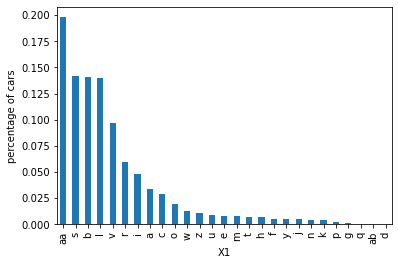

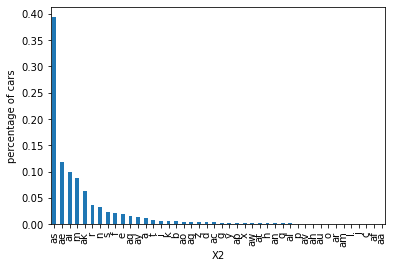

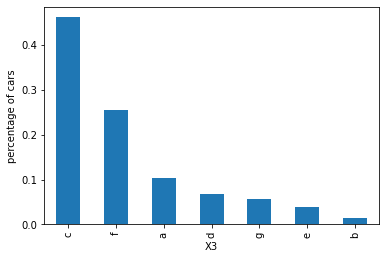

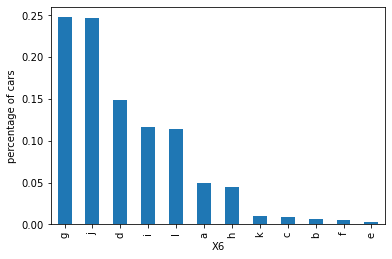

In [67]:
total_cars = len(data)
for col in cols:
    temp_df = pd.Series(data[col].value_counts() / total_cars)
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.set_ylabel('percentage of cars')
    plt.show()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use].fillna(0), data.y,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((2946, 5), (1263, 5))

In [69]:
for col in cols_to_use:
   
    total_cars = len(X_train)
    temp_df = pd.Series(X_train[col].value_counts() / total_cars)
    categories_to_keep = temp_df[temp_df>=0.1].index # non-rare labels
    
    # group observations with infrequent labels under the most frequent label 
    frequent_cat = X_train.groupby(col)[col].count().sort_values().tail(1).index.values[0]
       
    # group observations with infrequent labels under new label "Rare"
  
    X_train[col+'_rare_imp'] = np.where(X_train[col].isin(categories_to_keep), X_train[col], 'rare')
    X_test[col+'_rare_imp'] = np.where(X_test[col].isin(categories_to_keep), X_test[col], 'rare')
       
    X_train[col+'_freq_imp'] = np.where(X_train[col].isin(categories_to_keep), X_train[col], frequent_cat)
    X_test[col+'_freq_imp'] = np.where(X_test[col].isin(categories_to_keep), X_test[col], frequent_cat)

    
X_train.head()

,y,X1,X2,X3,X6,y_rare_imp,y_freq_imp,X1_rare_imp,X1_freq_imp,X2_rare_imp,X2_freq_imp,X3_rare_imp,X3_freq_imp,X6_rare_imp,X6_freq_imp
3059,87.22,aa,ai,c,g,rare,89.38,aa,aa,rare,as,c,c,g,g
3014,100.05,b,m,c,i,rare,89.38,b,b,rare,as,c,c,i,i
3368,105.82,o,f,f,l,rare,89.38,rare,aa,rare,as,f,f,l,l
2772,103.68,aa,as,d,j,rare,89.38,aa,aa,as,as,rare,c,j,j
3383,109.60,v,e,c,g,rare,89.38,rare,aa,rare,as,c,c,g,g


In [70]:
cols = ['X1', 'X2','X3', 'X6']
cols_freq = [x+'_freq_imp' for x in cols]
cols_rare = [x+'_rare_imp' for x in cols]

In [71]:
[x for x in X_test.X2.unique() if x not in X_train.X2.unique()]

['ar', 'j']

In [72]:
frequent_cat = X_train.groupby('X2')['X2'].count().sort_values().tail(1).index.values[0]
frequent_cat

'as'

In [73]:
X_test['X2'] = np.where(X_test['X2'].isin(['ar', 'j']), frequent_cat, X_test['X2'])
[x for x in X_test.X2.unique() if x not in X_train.X2.unique()]

[]

In [74]:
labels_to_numbers(X_train, X_test, cols)
train_rf(X_train, y_train, X_test, y_test, cols)

Train: Random Forests mse: 73.59594646983437
Test: Random Forests mse: 147.7356282423639


In [75]:
labels_to_numbers(X_train, X_test, cols_rare)
train_rf(X_train, y_train, X_test, y_test, cols_rare)

Train: Random Forests mse: 120.81355982398952
Test: Random Forests mse: 156.42237366622095


In [76]:
labels_to_numbers(X_train, X_test, cols_freq)
train_rf(X_train, y_train, X_test, y_test, cols_freq)

Train: Random Forests mse: 136.7282308765876
Test: Random Forests mse: 165.55570783641167


Observation: Improvement in accuracy can be seen